In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
from nilearn import plotting
from nilearn.image import mean_img, index_img
from nilearn.glm import first_level, threshold_stats_img

In [5]:

run1 = nib.load('C:/Users/Nafir/Documents/Python in Neuroimaging/swarsub-01_ses-mri_task-facerecognition_run-01_bold.nii')
run2 = nib.load('C:/Users/Nafir/Documents/Python in Neuroimaging/swarsub-01_ses-mri_task-facerecognition_run-02_bold.nii')

event1 = pd.read_table('C:/Users/Nafir/Documents/Python in Neuroimaging/sub-01_ses-mri_task-facerecognition_run-01_events.tsv')
event2 = pd.read_table('C:/Users/Nafir/Documents/Python in Neuroimaging/sub-01_ses-mri_task-facerecognition_run-02_events.tsv')

In [35]:
tr = 2
n_volumes = run1.shape[3]
frame_times = np.arange(n_volumes) * tr

In [37]:
frame_times

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258,
       260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284,
       286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310,
       312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336,
       338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 36

In [15]:
event1.rename(columns = {'stim_type': 'trial_type'}, inplace = True)
event2.rename(columns = {'stim_type': 'trial_type'}, inplace = True)

In [23]:
event1 = event1.dropna()
event2 = event2.dropna()


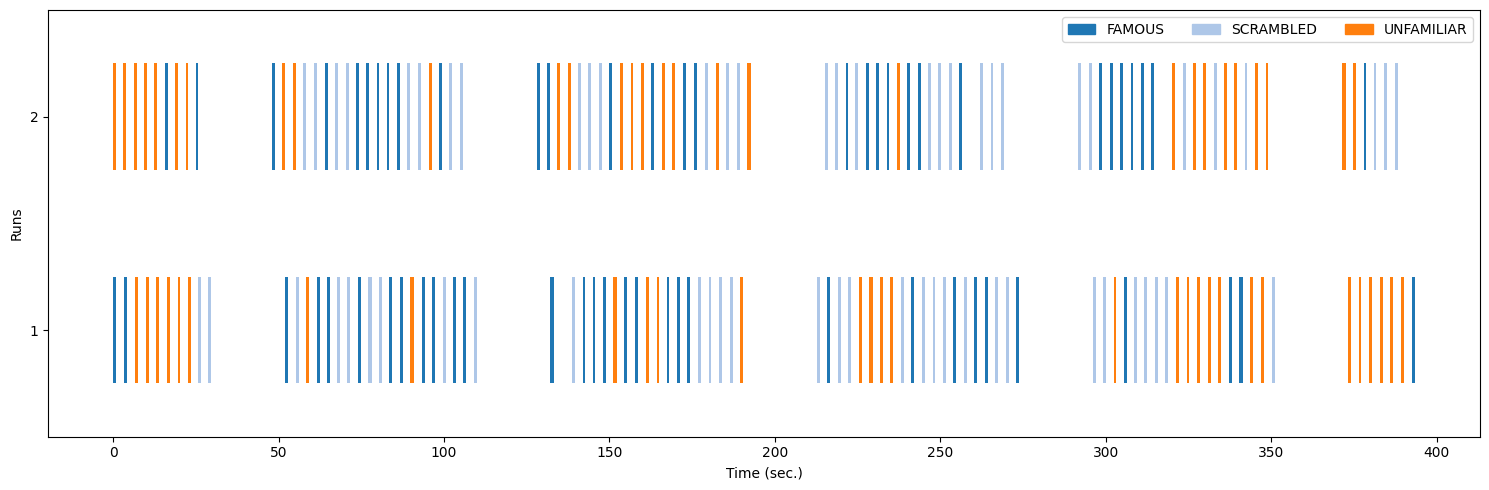

In [31]:
plotting.plot_event([event1, event2] , figsize = (15,5))
plt.show()

In [39]:
design_matrix_run1 = first_level.make_first_level_design_matrix(frame_times, event1, drift_model = 'cosine' ,high_pass = 0.01 ,hrf_model = 'spm' )

C:\Users\Nafir\anaconda3\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:88: UserWarning: Unexpected column 'button_pushed' in events data. It will be ignored.
  warnings.warn(
C:\Users\Nafir\anaconda3\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:88: UserWarning: Unexpected column 'trigger' in events data. It will be ignored.
  warnings.warn(
C:\Users\Nafir\anaconda3\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:88: UserWarning: Unexpected column 'stim_file' in events data. It will be ignored.
  warnings.warn(
C:\Users\Nafir\anaconda3\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:88: UserWarning: Unexpected column 'circle_duration' in events data. It will be ignored.
  warnings.warn(
C:\Users\Nafir\anaconda3\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:88: UserWarning: Unexpected column 'response_time' in events data. It will be ignored.
  warnings.warn(
C:\Users\Nafir\anaconda3\Lib

In [41]:
design_matrix_run2 = first_level.make_first_level_design_matrix(frame_times, event2, drift_model = 'cosine' ,high_pass = 0.01 ,hrf_model = 'spm' )

C:\Users\Nafir\anaconda3\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:88: UserWarning: Unexpected column 'button_pushed' in events data. It will be ignored.
  warnings.warn(
C:\Users\Nafir\anaconda3\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:88: UserWarning: Unexpected column 'trigger' in events data. It will be ignored.
  warnings.warn(
C:\Users\Nafir\anaconda3\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:88: UserWarning: Unexpected column 'stim_file' in events data. It will be ignored.
  warnings.warn(
C:\Users\Nafir\anaconda3\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:88: UserWarning: Unexpected column 'circle_duration' in events data. It will be ignored.
  warnings.warn(
C:\Users\Nafir\anaconda3\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:88: UserWarning: Unexpected column 'response_time' in events data. It will be ignored.
  warnings.warn(
C:\Users\Nafir\anaconda3\Lib

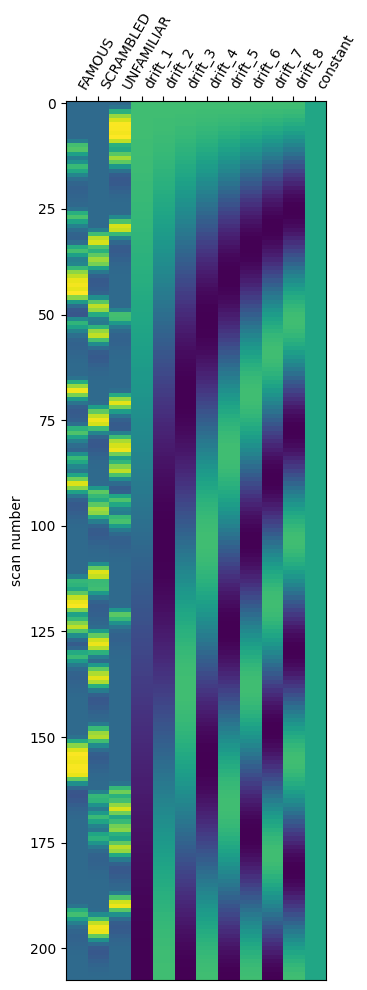

In [43]:
plotting.plot_design_matrix(design_matrix_run2)
plotting.show()

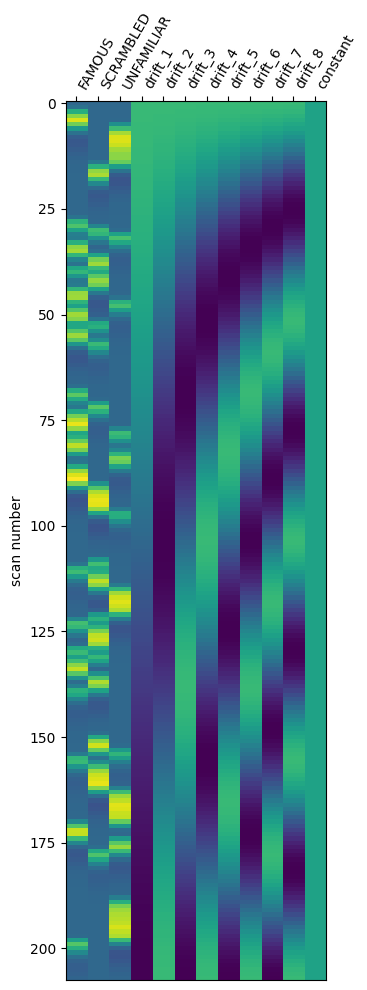

In [45]:
plotting.plot_design_matrix(design_matrix_run1)
plotting.show()

In [47]:
fmri_img = [run1,run2]
design_metrics = [design_matrix_run1, design_matrix_run2]

In [49]:
mean_image = mean_img(fmri_img)

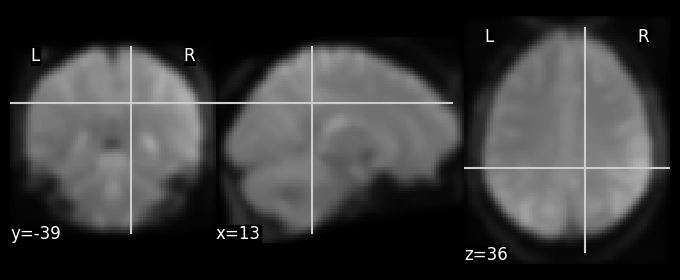

In [51]:
plotting.plot_anat(mean_image)

In [55]:
fmri_glm = first_level.FirstLevelModel()
fmri_glm2 = fmri_glm.fit(fmri_img, design_matrices = design_metrics)

### Contrast

In [58]:
design_matrix_run1

,FAMOUS,SCRAMBLED,UNFAMILIAR,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,drift_7,drift_8,constant
0,0.000000,0.0,0.000000,0.098055,0.098047,0.098033,0.098013,0.097988,0.097957,0.097921,0.097879,1.0
2,0.018163,0.0,0.000000,0.098033,0.097957,0.097832,0.097656,0.097430,0.097153,0.096828,0.096452,1.0
4,0.146596,0.0,0.000000,0.097988,0.097779,0.097430,0.096942,0.096316,0.095552,0.094653,0.093618,1.0
6,0.245607,0.0,0.000000,0.097921,0.097511,0.096828,0.095874,0.094653,0.093167,0.091421,0.089419,1.0
8,0.306281,0.0,0.002676,0.097832,0.097153,0.096027,0.094456,0.092450,0.090017,0.087168,0.083916,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
406,-0.008799,0.0,-0.034662,-0.097832,0.097153,-0.096027,0.094456,-0.092450,0.090017,-0.087168,0.083916,1.0
408,-0.017415,0.0,-0.023336,-0.097921,0.097511,-0.096828,0.095874,-0.094653,0.093167,-0.091421,0.089419,1.0
410,-0.016857,0.0,-0.013624,-0.097988,0.097779,-0.097430,0.096942,-0.096316,0.095552,-0.094653,0.093618,1.0
412,-0.012388,0.0,-0.007060,-0.098033,0.097957,-0.097832,0.097656,-0.097430,0.097153,-0.096828,0.096452,1.0


In [60]:
contrast = np.eye(design_matrix_run1.shape[1])

In [62]:
contrast

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [70]:
base_cont = {}
for i, column in enumerate(design_matrix_run1.columns):
    base_cont[column] = contrast[i]

In [72]:
base_cont

{'FAMOUS': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'SCRAMBLED': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'UNFAMILIAR': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'drift_1': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'drift_2': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'drift_3': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'drift_4': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'drift_5': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'drift_6': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'drift_7': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'drift_8': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'constant': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [74]:
'''Famous >>> Scrambled'''
famous_scrambled = base_cont['FAMOUS'] - base_cont['SCRAMBLED']
famous_scrambled

In [78]:
''' Face >>>> Scramnled'''
face_scrambled = (base_cont['FAMOUS'] + base_cont['UNFAMILIAR']) / 2 - base_cont['SCRAMBLED']
face_scrambled

array([ 0.5, -1. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ])

<Axes: label='conditions'>

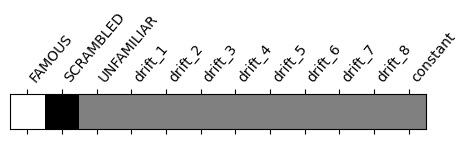

In [82]:
plotting.plot_contrast_matrix(famous_scrambled, design_matrix_run2)

<Axes: label='conditions'>

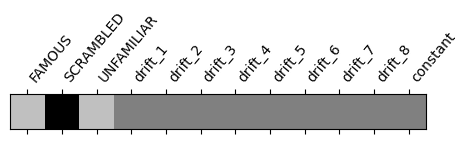

In [84]:
plotting.plot_contrast_matrix(face_scrambled, design_matrix_run2)

In [92]:
z_map = fmri_glm2.compute_contrast([famous_scrambled, famous_scrambled], output_type = 'z_score')

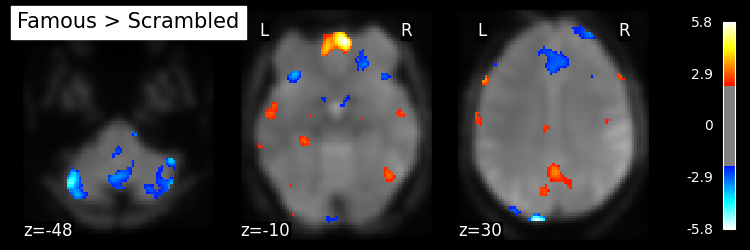

In [96]:
plotting.plot_stat_map(z_map, bg_img = mean_image, threshold = 2.3, display_mode = 'z', cut_coords = 3, title = 'Famous > Scrambled')

In [100]:
z_map = fmri_glm2.compute_contrast([face_scrambled, face_scrambled], output_type = 'z_score')

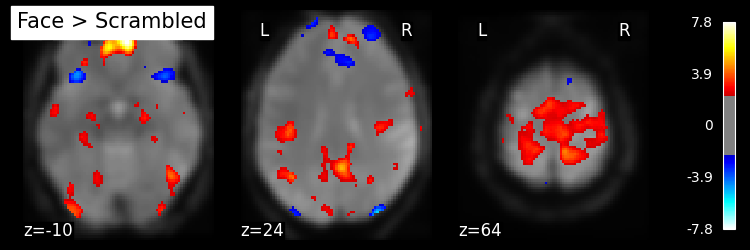

In [102]:
plotting.plot_stat_map(z_map, bg_img = mean_image, threshold = 2.3, display_mode = 'z', cut_coords = 3, title = 'Face > Scrambled')

### Task

Get the z_map of each contrast for Sub-02(run01 - run09):


Famous >> Scrambled

Unfamiliar >> Scrambled

Face >> Scrambled

Famous >> Unfamiliar